In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

krasnoye ru
petropavlovsk-kamchatskiy ru
taolanaro mg
lucban ph
nikolskoye ru
puerto ayora ec
neiafu to
san patricio mx
atuona pf
faanui pf
vao nc
mar del plata ar
codrington ag
vestmannaeyjar is
bredasdorp za
pallasovka ru
quelimane mz
rikitea pf
belaya gora ru
codrington ag
hastings nz
ewa beach us
olafsvik is
hermanus za
mataura pf
ushuaia ar
arraial do cabo br
raudeberg no
adrar dz
yuncheng cn
eyl so
dikson ru
bluff nz
kaitangata nz
bulgan mn
rikitea pf
mantua cu
le port re
punta arenas cl
sao francisco do sul br
tsihombe mg
roma au
caravelas br
esperance au
hermanus za
ati td
clyde river ca
mataura pf
porangatu br
fairbanks us
bermeo es
fairbanks us
port alfred za
ushuaia ar
saint-philippe re
ushuaia ar
busselton au
rikitea pf
ushuaia ar
kununurra au
aasiaat gl
atuona pf
rikitea pf
alotau pg
bahia blanca ar
burica pa
butaritari ki
mataura pf
bethel us
tiksi ru
ilulissat gl
sayyan ye
punta arenas cl
carnarvon au
kautokeino no
bethel us
saskylakh ru
busselton au
bambanglipuro id
ush

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | krasnoye
Processing Record 2 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | lucban
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | neiafu
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | vestmannaeyjar
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | pallasovka
Processing Record 17 of Set 1 | quelimane
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | belaya gora
Processing Record 20 of Set 1 | hastings
Processing Record 21 of Set 1 | ewa beach
Processing Record 22 of 

In [8]:
len(city_data)

565

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Krasnoye,49.91,24.61,35.60,93,0,1.25,UA,2020-11-01 19:04:43
1,Petropavlovsk-Kamchatskiy,53.05,158.65,30.20,80,24,6.71,RU,2020-11-01 19:02:43
2,Lucban,14.11,121.56,68.90,98,100,3.00,PH,2020-11-01 19:04:44
3,Nikolskoye,59.70,30.79,34.00,100,90,8.95,RU,2020-11-01 19:04:44
4,Puerto Ayora,-0.74,-90.35,78.80,69,75,20.80,EC,2020-11-01 19:04:45
5,Neiafu,-18.65,-173.98,75.20,94,75,11.41,TO,2020-11-01 19:01:07
6,San Patricio,28.02,-97.52,82.00,44,20,9.17,US,2020-11-01 19:04:45
7,Atuona,-9.80,-139.03,78.19,77,14,14.56,PF,2020-11-01 19:04:45
8,Faanui,-16.48,-151.75,79.70,80,46,23.26,PF,2020-11-01 19:04:45
9,Vao,-22.67,167.48,74.07,85,100,17.45,NC,2020-11-01 19:04:46


In [10]:
# Reorder columns in city_data DataFrame.
new_order_city_data = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 
                       'Humidity', 'Cloudiness', 'Wind Speed']
# Reassign reordered DataFrame to city_data DataFrame.
city_data_df = city_data_df[new_order_city_data ]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Krasnoye,UA,2020-11-01 19:04:43,49.91,24.61,35.60,93,0,1.25
1,Petropavlovsk-Kamchatskiy,RU,2020-11-01 19:02:43,53.05,158.65,30.20,80,24,6.71
2,Lucban,PH,2020-11-01 19:04:44,14.11,121.56,68.90,98,100,3.00
3,Nikolskoye,RU,2020-11-01 19:04:44,59.70,30.79,34.00,100,90,8.95
4,Puerto Ayora,EC,2020-11-01 19:04:45,-0.74,-90.35,78.80,69,75,20.80
5,Neiafu,TO,2020-11-01 19:01:07,-18.65,-173.98,75.20,94,75,11.41
6,San Patricio,US,2020-11-01 19:04:45,28.02,-97.52,82.00,44,20,9.17
7,Atuona,PF,2020-11-01 19:04:45,-9.80,-139.03,78.19,77,14,14.56
8,Faanui,PF,2020-11-01 19:04:45,-16.48,-151.75,79.70,80,46,23.26
9,Vao,NC,2020-11-01 19:04:46,-22.67,167.48,74.07,85,100,17.45


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604258855.218296

In [15]:
# Format date.
today = time.strftime('%x')
today

'11/01/20'

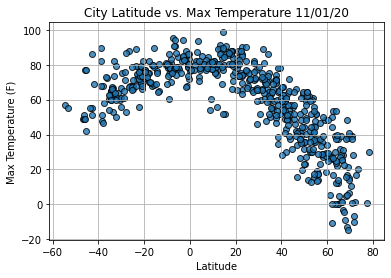

In [16]:
#import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

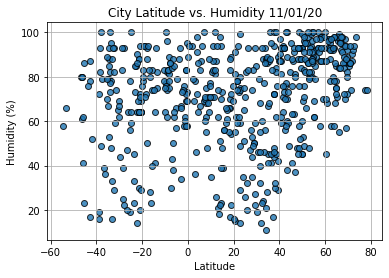

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

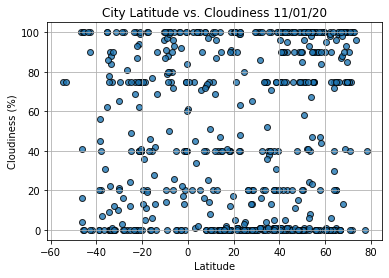

In [20]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

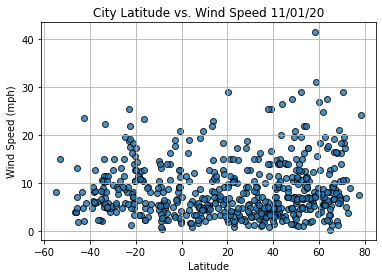

In [22]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()